In [1]:
%pylab inline
import sys
sys.path.append("/mnt/home/ecunningham/python")
plt.style.use('~/matplotlib.mplstyle')
import io_sims as ios
import gizmo_analysis as ga
import pynbody
import halo_analysis as halo
from gizmo_pynbody_analysis_workflow import *
import nba
import plotting as pl

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
sim_directory = "/mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/"

In [3]:
sim='m12b'
m12b = FIRE(sim)
m12b_no_sat = FIRE(sim, remove_satellite=True)
#m12b_no_subs = FIRE(sim, remove_subs=True)
m12b_no_sat_subs = FIRE(sim, remove_satellite=True, remove_subs=True)


In [4]:
m12b_rot = m12b.rotated_halo(300)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/output/snapdir_300/snapshot_300.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 74537000 particles
    dark2     (id = 2): 6750970 particles
    gas       (id = 0): 66706907 particles
    star      (id = 4): 8052512 particles
    blackhole (id = 5): 0 particles

* reading species: ['dark', 'star']
* reading particles from:
    snapshot_300.0.hdf5
    snapshot_300.1.hdf5
    snapshot_300.2.hdf5
    snapshot_300.3.hdf5
    snapshot_300.4.hdf5
    snapshot_300.5.hdf5
    snapshot_300.6.hdf5
    snapshot_300.7.hdf5

* reading cosmological parameters from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/initial_condition/ic_agora_m12b.conf

* sorting the following d

In [5]:
m12b_no_sat = m12b_no_sat.rotated_halo(300)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/output/snapdir_300/snapshot_300.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 74537000 particles
    dark2     (id = 2): 6750970 particles
    gas       (id = 0): 66706907 particles
    star      (id = 4): 8052512 particles
    blackhole (id = 5): 0 particles

* reading species: ['dark', 'star']
* reading particles from:
    snapshot_300.0.hdf5
    snapshot_300.1.hdf5
    snapshot_300.2.hdf5
    snapshot_300.3.hdf5
    snapshot_300.4.hdf5
    snapshot_300.5.hdf5
    snapshot_300.6.hdf5
    snapshot_300.7.hdf5

* reading cosmological parameters from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/initial_condition/ic_agora_m12b.conf

* sorting the following d

In [6]:
#m12b_no_subs = m12b_no_subs.rotated_halo(385)

In [6]:
m12b_no_sat_subs = m12b_no_sat_subs.rotated_halo(300)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/output/snapdir_300/snapshot_300.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 74537000 particles
    dark2     (id = 2): 6750970 particles
    gas       (id = 0): 66706907 particles
    star      (id = 4): 8052512 particles
    blackhole (id = 5): 0 particles

* reading species: ['dark', 'star']
* reading particles from:
    snapshot_300.0.hdf5
    snapshot_300.1.hdf5
    snapshot_300.2.hdf5
    snapshot_300.3.hdf5
    snapshot_300.4.hdf5
    snapshot_300.5.hdf5
    snapshot_300.6.hdf5
    snapshot_300.7.hdf5

* reading cosmological parameters from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/initial_condition/ic_agora_m12b.conf

* sorting the following d

SimArray([[ 35.67615  ,  35.93189  ,  34.346386 , ...,  10.245564 ,
             9.663348 ,   9.062025 ],
          [ 36.982063 ,  39.49492  ,  38.52435  , ...,   9.887629 ,
             9.366791 ,   8.831036 ],
          [ 34.702724 ,  36.434284 ,  35.30997  , ...,   9.550596 ,
             9.088634 ,   8.615242 ],
          ...,
          [156.96211  , 124.863045 , 136.9427   , ...,   6.1824026,
             6.0337777,   5.8776817],
          [155.49548  , 124.490204 , 116.601456 , ...,   6.259697 ,
             6.1119156,   5.9566126],
          [124.01611  , 109.51084  ,  94.89449  , ...,   6.3391485,
             6.1922817,   6.0378447]], dtype=float32, '1.00e+10 Msol kpc**-3')

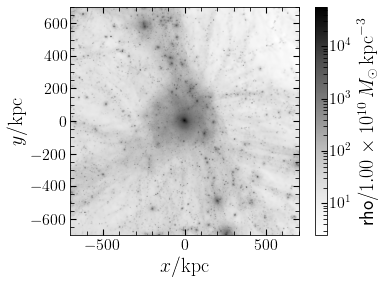

In [16]:
pynbody.plot.image(m12b_no_sat_subs.d, width=1400, av_z=True, cmap='Greys')

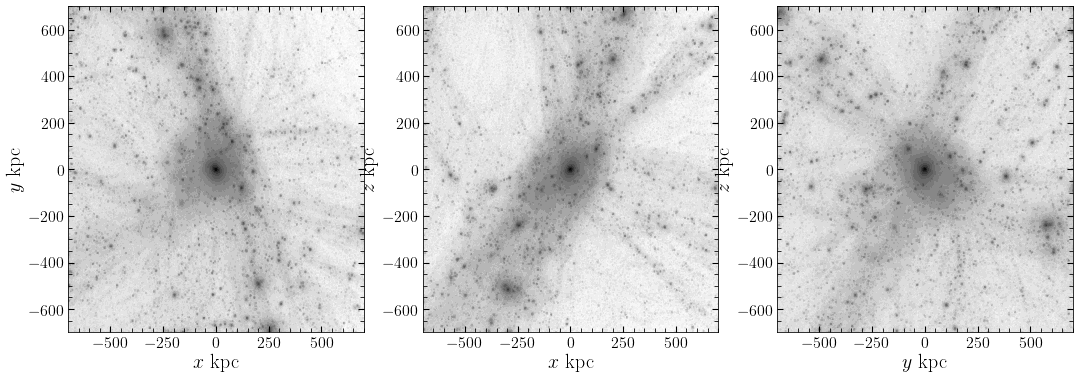

In [33]:
fig, ax = plt.subplots(1,3, figsize=(18,6))


rho1, x1, y1  = pynbody.plot.generic.hist2d(m12b_no_sat_subs.dark['pos'][:,0],
                                           m12b_no_sat_subs.dark['pos'][:,1], 
                                           weights=None, mass=None, 
                                           gridsize=(600, 600), nbins=1000, subplot=ax[0], cmap='Greys',
                                           xlabel=r'$x\ \mathrm{kpc}$', ylabel=r'$y\ \mathrm{kpc}$')

rho2, x2, y2  = pynbody.plot.generic.hist2d(m12b_no_sat_subs.dark['pos'][:,0],
                                           m12b_no_sat_subs.dark['pos'][:,2], 
                                           weights=None, mass=None, 
                                           gridsize=(600, 600), nbins=1000, subplot=ax[1], cmap='Greys',
                                           xlabel=r'$x\ \mathrm{kpc}$', ylabel=r'$z\ \mathrm{kpc}$')

rho2, x2, y2  = pynbody.plot.generic.hist2d(m12b_no_sat_subs.dark['pos'][:,1],
                                           m12b_no_sat_subs.dark['pos'][:,2], 
                                           weights=None, mass=None, 
                                           gridsize=(600, 600), nbins=1000, subplot=ax[2], cmap='Greys', 
                                           xlabel=r'$y\ \mathrm{kpc}$', ylabel=r'$z\ \mathrm{kpc}$')
for i in range(3):
    ax[i].set_xlim(-700, 700)
    ax[i].set_ylim(-700, 700)
    
plt.savefig('DM_filaments_300.png', bbox_inches='tight')

In [20]:
pynbody.plot.generic.hist2d?

In [ ]:
rho2, x2, y2  = pynbody.plot.generic.hist2d(m12b_no_sat_subs.dark['pos'][:,1],
                                           m12b_no_sat_subs.dark['pos'][:,2], 
                                           weights=None, mass=None, 
                                           gridsize=(500, 500), nbins=1000, subplot=ax[1], cmap='Greys')

In [24]:
rmin=50
rmax=300

dist_m12b_rot = np.sqrt(np.sum(m12b_rot.dark['pos']**2, axis=1))
dcut_rot = np.where((dist_m12b_rot>rmin) & ((dist_m12b_rot<rmax))) 

dist_m12b_no_sat = np.sqrt(np.sum(m12b_no_sat.dark['pos']**2, axis=1))
dcut_no_sat = np.where((dist_m12b_no_sat<rmax) & (dist_m12b_no_sat>rmin))


dist_m12b_no_sat_subs = np.sqrt(np.sum(m12b_no_sat_subs.dark['pos']**2, axis=1))
dcut_no_sat_subs = np.where((dist_m12b_no_sat_subs>rmin) & ((dist_m12b_no_sat_subs<rmax)))

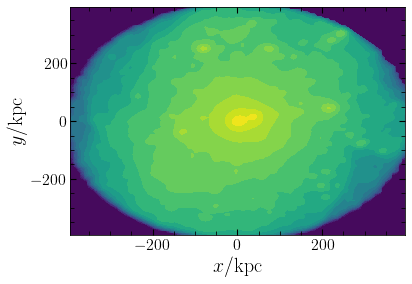

In [29]:
rho, xs, ys = pynbody.plot.generic.gauss_kde(m12b_rot.dark['pos'][dcut_rot[0],0],
                                             m12b_rot.dark['pos'][dcut_rot[0],2], 
                                             weights=None, mass=None, gridsize=(100, 100), nbins=100)

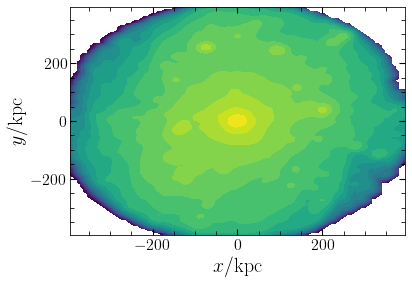

In [31]:
rho_nss, xs_nss, ys_nss = pynbody.plot.generic.gauss_kde(m12b_no_sat_subs.dark['pos'][dcut_no_sat_subs[0],0], 
                                                         m12b_no_sat_subs.dark['pos'][dcut_no_sat_subs[0],2], 
                                                         weights=None, mass=None, gridsize=(100, 100), nbins=100)

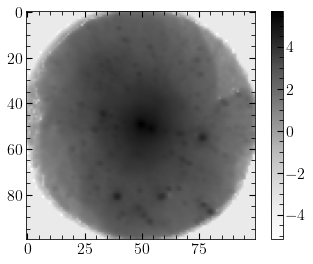

In [40]:
imshow(np.log10(np.abs(rho_nss-rho)), cmap='Greys')
colorbar()

In [25]:
all_kinematics = nba.kinematics.Kinematics(m12b_rot.dark['pos'][dcut_rot],  m12b_rot.dark['vel'][dcut_rot])



no_sat_no_subs_kinematics = nba.kinematics.Kinematics(m12b_no_sat_subs.dark['pos'][dcut_no_sat_subs],
                                                      m12b_no_sat_subs.dark['vel'][dcut_no_sat_subs])

no_sat_kinematics = nba.kinematics.Kinematics(m12b_no_sat.dark['pos'][dcut_no_sat],
                                              m12b_no_sat.dark['vel'][dcut_no_sat])

In [26]:
dm_OP_l_host, dm_OP_b_host = all_kinematics.orbpole()

In [27]:
dm_OP_l_host2, dm_OP_b_host2 = no_sat_no_subs_kinematics.orbpole()

In [28]:
dm_OP_l_host3, dm_OP_b_host3 = no_sat_kinematics.orbpole()

In [34]:
pl.mollweide_projection(dm_OP_l_host, dm_OP_b_host, 0, 0, 
                        title="", bmin=1, bmax=1000, smooth=1,
                        nside=40, figname="./m12b_OP_all_subs_50_300_snap300.png")
   

* Saving figure in  ./m12b_OP_all_subs_50_300_snap300.png


In [30]:
print(len(dm_OP_b_host2), len(dm_OP_b_host), len(dm_OP_b_host3))

2713702 19590331 18710481


In [31]:
pl.mollweide_projection(dm_OP_l_host2, dm_OP_b_host2, -50, 10, 
                        title="", bmin=1, bmax=200, smooth=1,
                        nside=40, figname="./m12b_OP_no_sat_no_subs_50_300_snap300.png")

* Saving figure in  ./m12b_OP_no_sat_no_subs_50_300_snap300.png


In [32]:
pl.mollweide_projection(dm_OP_l_host3, dm_OP_b_host3, 0, 0, 
                        title="", bmin=1, bmax=1000, smooth=1,
                        nside=40, figname="./m12b_OP_no_sat_50_300_snap300.png")

* Saving figure in  ./m12b_OP_no_sat_50_300_snap300.png


In [28]:
## def selecting particles by OP

70050211

In [78]:
np.min(dm_OP_l_host2)

-179.99999575973845

In [91]:
def select_OP_part(lall, ball, lc, bc, radius=15):
    # l [-180, 180]
    # b [-90, 90]
    
    select_OP = np.where(np.sqrt((lall-lc)**2 + (ball-bc)**2) < radius)
    return lall[select_OP], ball[select_OP], select_OP
    

In [92]:
OP_ovd1 = select_OP_part(dm_OP_l_host2, dm_OP_b_host2, 80, 30)

In [202]:
OP_ovd2 = select_OP_part(dm_OP_l_host2, dm_OP_b_host2, 50, 52, radius=7)

In [201]:
OP_ovd3 = select_OP_part(dm_OP_l_host2, dm_OP_b_host2, -50, 10, radius=10)

In [89]:
pl.mollweide_projection(OP_ovd1[0], OP_ovd1[1], 80, 30, 
                        title="", bmin=100, bmax=1000, smooth=1,
                        nside=40, figname="./test_OP_selection_300.png")

* Saving figure in  ./test_OP_selection_300.png


In [97]:
pos_sel = m12b_no_sat_subs.dark['pos'][dcut_no_sat_subs][OP_ovd1[2]]

In [194]:
pos_sel2 = m12b_no_sat_subs.dark['pos'][dcut_no_sat_subs][OP_ovd2[2]]

In [203]:
pos_sel3 = m12b_no_sat_subs.dark['pos'][dcut_no_sat_subs][OP_ovd3[2]]

([<matplotlib.axis.YTick at 0x7f16d434f850>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

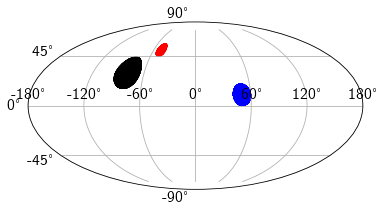

In [259]:
fig = plt.subplot(111,  projection='mollweide')
scatter(-OP_ovd1[0]*np.pi/180, OP_ovd1[1]*np.pi/180, s=0.01, c='k', alpha=0.01)
scatter(-OP_ovd2[0]*np.pi/180, OP_ovd2[1]*np.pi/180, s=0.01, c='r', alpha=0.01)
scatter(-OP_ovd3[0]*np.pi/180, OP_ovd3[1]*np.pi/180, s=0.01, c='b', alpha=0.01)
#ax.set_xlim(-180, 180)
#ax.set_ylim(-180, 180)
grid()
xticks([-np.pi, -2*np.pi/3.,  -np.pi/3., 0, np.pi/3., 2*np.pi/3., np.pi])
yticks([-np.pi/2., -np.pi/4., 0, np.pi/4., np.pi/2.])



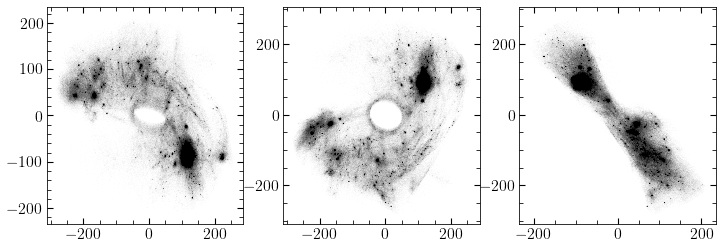

In [205]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].scatter(pos_sel[:,0], pos_sel[:,1], s=0.1, c='k', alpha=0.01)
ax[1].scatter(pos_sel[:,0], pos_sel[:,2], s=0.1, c='k', alpha=0.01)
ax[2].scatter(pos_sel[:,1], pos_sel[:,2], s=0.1, c='k', alpha=0.01)

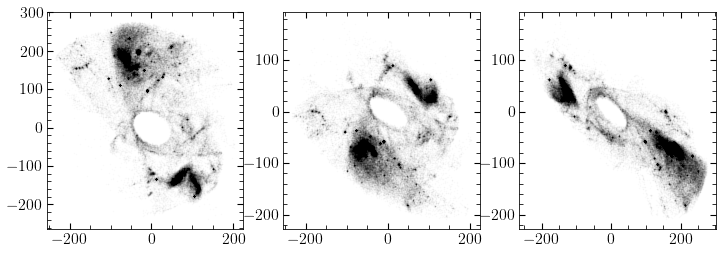

In [196]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].scatter(pos_sel2[:,0], pos_sel2[:,1], s=1, c='k', alpha=0.01)
ax[1].scatter(pos_sel2[:,0], pos_sel2[:,2], s=1, c='k', alpha=0.01)
ax[2].scatter(pos_sel2[:,1], pos_sel2[:,2], s=1, c='k', alpha=0.01)

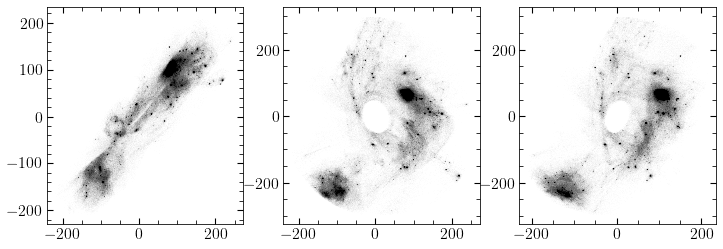

In [206]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].scatter(pos_sel3[:,0], pos_sel3[:,1], s=0.1, c='k', alpha=0.01)
ax[1].scatter(pos_sel3[:,0], pos_sel3[:,2], s=0.1, c='k', alpha=0.01)
ax[2].scatter(pos_sel3[:,1], pos_sel3[:,2], s=0.1, c='k', alpha=0.01)

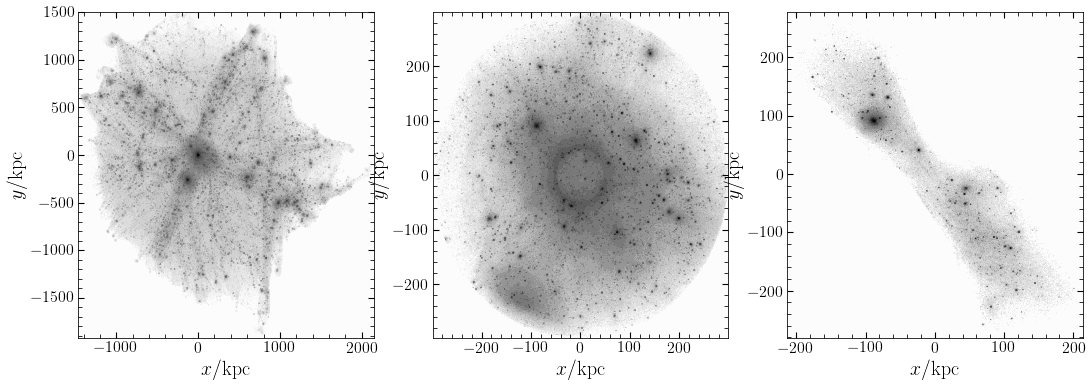

In [261]:
fig, ax = plt.subplots(1,3, figsize=(18,6))


rho1, x1, y1  = pynbody.plot.generic.hist2d(m12b_no_sat_subs.dark['pos'][:,1],
                                           m12b_no_sat_subs.dark['pos'][:,2], 
                                           weights=None, mass=None, 
                                           gridsize=(500, 500), nbins=1000, subplot=ax[0], cmap='Greys')

rho2, x2, y2  = pynbody.plot.generic.hist2d(m12b_no_sat_subs.dark['pos'][dcut_no_sat_subs][:,1],
                                           m12b_no_sat_subs.dark['pos'][dcut_no_sat_subs][:,2], 
                                           weights=None, mass=None, 
                                           gridsize=(500, 500), nbins=1000, subplot=ax[1], cmap='Greys')

rho3, x3, y3  = pynbody.plot.generic.hist2d(pos_sel[:,1], pos_sel[:,2],
                                           weights=None, mass=None, 
                                           gridsize=(500, 500), nbins=1000, subplot=ax[2], cmap='Greys')

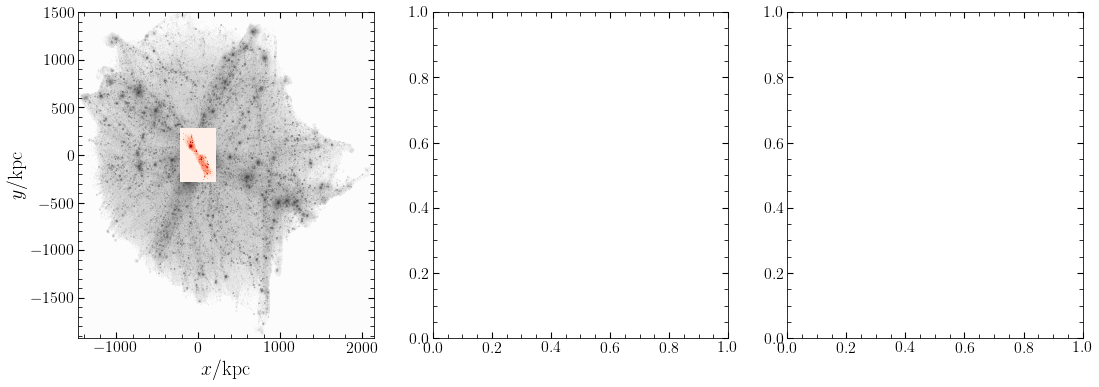

In [263]:
fig, ax = plt.subplots(1,3, figsize=(18,6))


rho1, x1, y1  = pynbody.plot.generic.hist2d(m12b_no_sat_subs.dark['pos'][:,1],
                                           m12b_no_sat_subs.dark['pos'][:,2], 
                                           weights=None, mass=None, 
                                           gridsize=(500, 500), nbins=1000, subplot=ax[0], cmap='Greys')


rho3, x3, y3  = pynbody.plot.generic.hist2d(pos_sel[:,1], pos_sel[:,2],
                                           weights=None, mass=None, 
                                           gridsize=(500, 500), nbins=1000, subplot=ax[0], cmap='Reds')

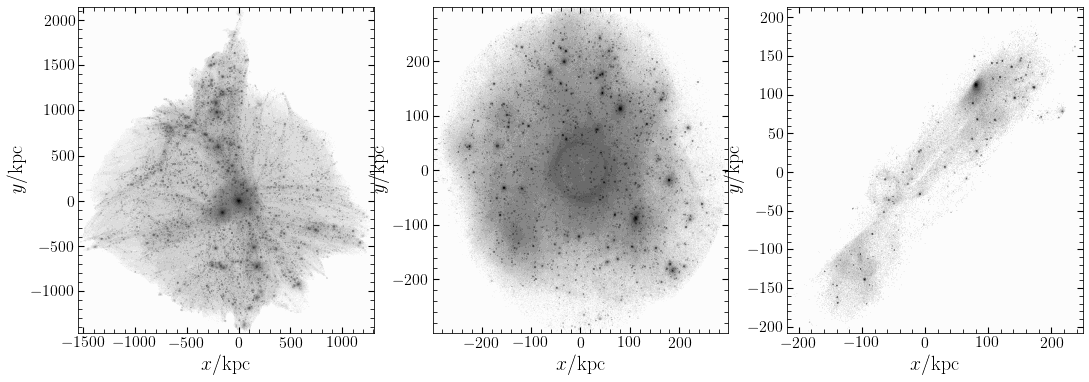

In [246]:
fig, ax = plt.subplots(1,3, figsize=(18,6))


rho1, x1, y1  = pynbody.plot.generic.hist2d(m12b_no_sat_subs.dark['pos'][:,0],
                                           m12b_no_sat_subs.dark['pos'][:,1], 
                                           weights=None, mass=None, 
                                           gridsize=(500, 500), nbins=1000, subplot=ax[0], cmap='Greys')

rho2, x2, y2  = pynbody.plot.generic.hist2d(m12b_no_sat_subs.dark['pos'][dcut_no_sat_subs][:,0],
                                           m12b_no_sat_subs.dark['pos'][dcut_no_sat_subs][:,1], 
                                           weights=None, mass=None, 
                                           gridsize=(500, 500), nbins=1000, subplot=ax[1], cmap='Greys')

rho3, x3, y3  = pynbody.plot.generic.hist2d(pos_sel3[:,0], pos_sel3[:,1],
                                           weights=None, mass=None, 
                                           gridsize=(500, 500), nbins=1000, subplot=ax[2], cmap='Greys')

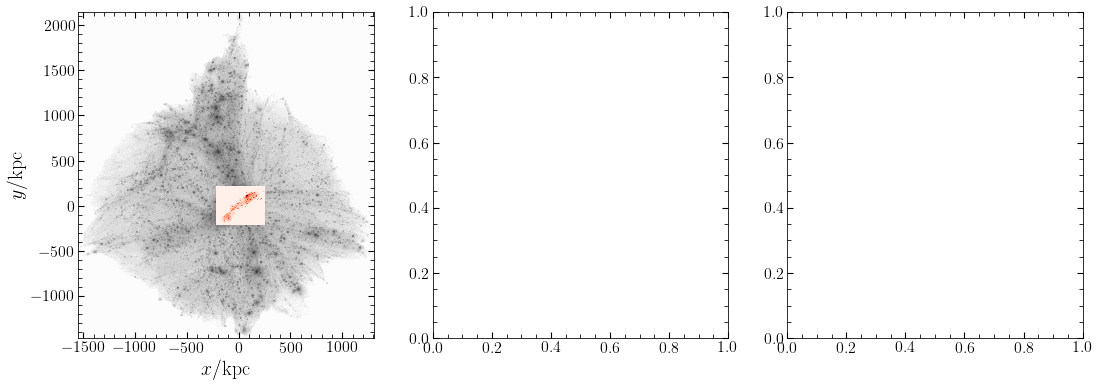

In [264]:
fig, ax = plt.subplots(1,3, figsize=(18,6))


rho1, x1, y1  = pynbody.plot.generic.hist2d(m12b_no_sat_subs.dark['pos'][:,0],
                                           m12b_no_sat_subs.dark['pos'][:,1], 
                                           weights=None, mass=None, 
                                           gridsize=(500, 500), nbins=1000, subplot=ax[0], cmap='Greys')



rho3, x3, y3  = pynbody.plot.generic.hist2d(pos_sel3[:,0], pos_sel3[:,1],
                                           weights=None, mass=None, 
                                           gridsize=(500, 500), nbins=1000, subplot=ax[0], cmap='Reds')

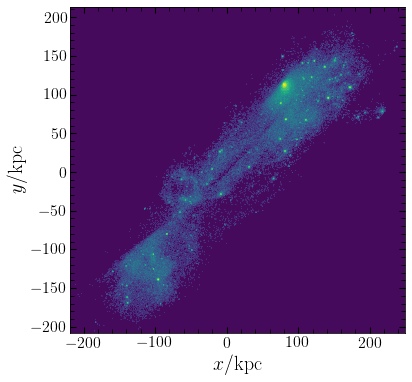

In [225]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

rho1, x1, y1  = pynbody.plot.generic.hist2d(pos_sel3[:,0], pos_sel3[:,1],
                                           weights=None, mass=None, 
                                           gridsize=(500, 500), nbins=1000)

In [ ]:
## Need to remove substrucutre 

(-500.0, 500.0)

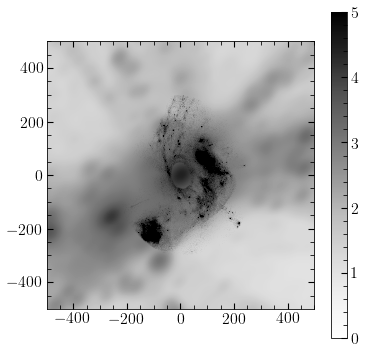

In [208]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
im = ax.imshow(np.log10(rho1.T),  
               cmap='Greys', origin='lower', extent=[np.min(y1), np.max(y1), 
                                                     np.min(x1), np.max(x1)],
              vmin=0, vmax=5)
fig.colorbar(im)
ax.scatter(pos_sel3[:,0], pos_sel3[:,2], s=0.1, c='k', alpha=0.01)

ax.set_xlim(-500, 500)
ax.set_ylim(-500, 500)

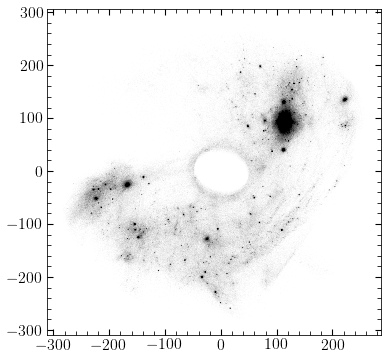

In [161]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
scatter(pos_sel[:,0], pos_sel[:,2], s=0.1, c='k', alpha=0.01)
